# Multi-class Classification and Neural Network

# 1. DataSet

## 1.1 Visualizing the data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [3]:
'''
fuction:  load mat data
input  :  path , transpose = True 
output :  X(5000, 400), y(5000)  ndarray
'''
def load_mat(path, transpose = True):
    data = sio.loadmat(path)
    y = data.get('y')
    y = y.reshape(y.shape[0])
    X = data.get('X')
    if transpose == True:
        # 转置
        X = np.array([im.reshape((20, 20)).T for im in X] )
        X = np.array([im.reshape(400) for im in X])
    return X, y
    

In [4]:
'''
fuction:  plot_an_image
input:    X的一行数 
output:   none
'''
def plot_an_image(image):
    fig, ax = plt.subplots(figsize = (1, 1))
    ax.matshow(image.reshape((20, 20)), cmap = matplotlib.cm.binary)
    plt.xticks([])
    plt.yticks([])

this type is 7


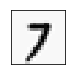

In [5]:
path = 'C:\\Users\\Dell_kevin\\Desktop\\NeuralNetwork\\ex3data1.mat'
X, y =load_mat(path)
test_xid = np.random.randint(X.shape[0])
plot_an_image(X[test_xid, :])
print("this type is {}".format(y[test_xid]))
plt.show()

In [6]:
'''
function: plot_100_image
input   ：X
output  : none
'''
def plt_100_images(X):
    # choose 100 X Sample
    #Xid = np.random.choice(X.shape[0], 5000)
    #image100 = X[Xid , :]
    rows = 100
    fig, ax_array = plt.subplots(nrows=rows, ncols=10, sharey=True, sharex=True, figsize=(10, rows))
    for i in range(rows):
        for j in range(10):
            ax_array[i, j].matshow(X[i*10+j + 1000, :].reshape((20, 20)),cmap = matplotlib.cm.binary )
            plt.xticks([])
            plt.yticks([])

In [7]:
#plt_100_images(X)
#plt.show()

## 2. Vectorizing Logistic Regression
### 2.1  Data Prepare

In [8]:
raw_X, raw_y = load_mat(path)
X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1)#插入了第一列（全部为1）
X.shape

(5000, 401)

In [9]:
# y have 10 categories here. 1..10, they represent digit 0 as category 10 because matlab index start at 1
# I'll ditit 0, index 0 again
y_matrix = [] # 列表

for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))

# last one is k==10, it's digit 0, bring it to the first position，最后一列k=10，都是0，把最后一列放到第一列
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

y.shape, X.shape

((10, 5000), (5000, 401))

### 2.2 Vectorizing Logistic Regression

In [10]:
'''
function: sigmoid
input   : z 
output  : sigmoid(z)
'''
#def sigmoid(z):
#    return 1/ (1 + np.exp(-z))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
'''
function: cost
input   : theta, X ,y
output  : cost
'''
def cost(theta, X ,y):
    return np.mean(-y * np.log( sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)) )


In [12]:
def regularized_cost(theta, X, y, l=1):
    '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()

    return cost(theta, X, y) + regularized_term


In [17]:
'''
function : gradient
input    : theta, X, y 
output   : grad
'''
#def gradient(theta, X, y ):
#    return X.T @ (sigmoid(X @ theta) - y)/len(X)
def gradient(theta, X, y):
    '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [14]:
'''
function : regularized_gradient
input    : theta, X, y, l
output   : grad
'''
def regularized_gradient(theta, X, y, l=1):
    '''still, leave theta_0 alone'''
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term
    

In [28]:
def logistic_regression(X, y, l=1):
    """generalized logistic regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.zeros(X.shape[1])

    # train it
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    # get trained parameters
    return res

In [26]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [31]:
res  = logistic_regression(X, y[1])
y_predict = predict(X, res.x)

In [33]:
print(classification_report(y[1], y_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4500
          1       0.97      0.96      0.97       500

avg / total       0.99      0.99      0.99      5000



In [35]:
for i in range(10):
    res  = logistic_regression(X, y[i])
    y_predict = predict(X, res.x)
    print('{}   classification_report'.format(i))
    print(classification_report(y[i], y_predict))
    

0   classification_report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4500
          1       0.99      0.98      0.99       500

avg / total       1.00      1.00      1.00      5000

1   classification_report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4500
          1       0.97      0.96      0.97       500

avg / total       0.99      0.99      0.99      5000

2   classification_report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4500
          1       0.96      0.85      0.90       500

avg / total       0.98      0.98      0.98      5000

3   classification_report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4500
          1       0.96      0.86      0.90       500

avg / total       0.98      0.98      0.98      5000

4   classification_report
          

## K维线性回归

In [36]:
k_theta = np.array([logistic_regression(X, y[k]).x for k in range(10)])

In [37]:
k_theta.shape

(10, 401)

In [38]:
y_matrix = sigmoid(X @ k_theta.T)

In [40]:
y_matrix_pre = np.argmax(y_matrix, axis=1)

In [41]:
y_matrix_pre.shape

(5000,)

In [42]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [43]:
y_answer = raw_y.copy()
y_answer[y_answer == 10] = 0

In [44]:
 print(classification_report(y_answer, y_matrix_pre))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       500
          1       0.95      0.99      0.97       500
          2       0.95      0.92      0.93       500
          3       0.95      0.91      0.93       500
          4       0.95      0.95      0.95       500
          5       0.92      0.92      0.92       500
          6       0.97      0.98      0.97       500
          7       0.95      0.95      0.95       500
          8       0.93      0.92      0.92       500
          9       0.92      0.92      0.92       500

avg / total       0.94      0.94      0.94      5000



# Neural Network

## load theta

In [45]:
def load_mat_theta(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

In [47]:
theta_path = 'C:\\Users\\Dell_kevin\\Desktop\\NeuralNetwork\\ex3weights.mat'
theta1, theta2  = load_mat_theta(theta_path)
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [50]:
X, y = load_mat(path,transpose=False)

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # intercept

X.shape, y.shape

((5000, 401), (5000,))

## Feedforward Propagation and Prediction


In [51]:
a1 = X

In [52]:
z2 = a1 @ theta1.T
z2.shape

(5000, 25)

In [53]:
a2 = sigmoid(z2)

In [54]:
a2.shape

(5000, 25)

In [55]:
a2 = np.insert(a2, 0, values=np.ones(X.shape[0]), axis=1)  # intercept

In [56]:
a2.shape

(5000, 26)

In [57]:
z3 = a2 @ theta2.T

In [58]:
a3 = sigmoid(z3)

In [59]:
a3.shape

(5000, 10)

In [60]:
y_pred = np.argmax(a3, axis=1) + 1

In [61]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          1       0.97      0.98      0.98       500
          2       0.98      0.97      0.98       500
          3       0.98      0.96      0.97       500
          4       0.97      0.97      0.97       500
          5       0.97      0.98      0.98       500
          6       0.98      0.99      0.98       500
          7       0.98      0.97      0.97       500
          8       0.98      0.98      0.98       500
          9       0.97      0.96      0.96       500
         10       0.98      0.99      0.99       500

avg / total       0.98      0.98      0.98      5000

